
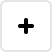
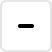
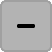
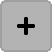
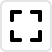
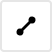
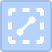
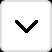
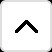
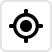

In [1]:
import pandas as pd

from lets_plot import *
from lets_plot.mapping import as_discrete
LetsPlot.setup_html()

In [2]:
def plot_matrix(plots=[], width=400, height=300, columns=2):
    bunch = GGBunch()
    for i in range(len(plots)):
        row = int(i / columns)
        column = i % columns
        bunch.add_plot(plots[i], column * width, row * height, width, height)
    return bunch.show()

In [3]:
mpg_df = pd.read_csv("https://raw.githubusercontent.com/JetBrains/lets-plot-docs/master/data/mpg.csv")

mpg_df.head()

Unnamed: 0 manufacturer model  displ  year  cyl       trans drv  cty  hwy  \
0           1         audi    a4    1.8  1999    4    auto(l5)   f   18   29   
1           2         audi    a4    1.8  1999    4  manual(m5)   f   21   29   
2           3         audi    a4    2.0  2008    4  manual(m6)   f   20   31   
3           4         audi    a4    2.0  2008    4    auto(av)   f   21   30   
4           5         audi    a4    2.8  1999    6    auto(l5)   f   16   26   

  fl    class  
0  p  compact  
1  p  compact  
2  p  compact  
3  p  compact  
4  p  compact

## Minimalistic example

In [4]:
ggplot(mpg_df, aes(y='hwy')) + geom_violin() + ggtitle("Simplest example")

## Comparison of geoms

In [5]:
p_d = ggplot(mpg_df) + \
    geom_density(aes(x='hwy', fill='drv'), color='black', alpha=.5) + \
    facet_grid(x='drv') + \
    coord_flip() + \
    ggtitle("geom_density()")
p_v = ggplot(mpg_df, aes(x=as_discrete('drv', order=1), y='hwy')) + \
    geom_violin(aes(fill='drv'), alpha=.5) + \
    ggtitle("geom_violin()")

plot_matrix([p_d, p_v])

## Original parameters

### `quantiles` and `quantile_lines`

In [6]:
tests = [
    {'quantile_lines': False, 'quantiles': None},
    {'quantile_lines': True, 'quantiles': None},
    {'quantile_lines': True, 'quantiles': []},
    {'quantile_lines': True, 'quantiles': [.05, .5, .95]},
    {'quantile_lines': True, 'quantiles': [.1]},
    {'quantile_lines': True, 'quantiles': [0, .5, 1]},
]

plot_matrix([
    ggplot(mpg_df, aes('drv', 'hwy')) + \
        geom_violin(aes(fill='..quantile..'), quantiles=test['quantiles'], quantile_lines=test['quantile_lines']) + \
        scale_fill_gradient(low='#91cf60', high='#fc8d59') + \
        ggtitle("quantiles={0}, quantile_lines={1}".format(test['quantiles'], test['quantile_lines']))
    for test in tests
])

### `scale`

In [7]:
tests = [
    {'scale': None},
    {'scale': 'area'},
    {'scale': 'count'},
    {'scale': 'width'},
]

plot_matrix([
    ggplot(mpg_df, aes('drv', 'hwy')) + \
        geom_violin(scale=test['scale'], \
                    quantile_lines=True) + \
        ggtitle("scale={0}".format(test['scale']))
    for test in tests
])

### `trim` and `tails_cutoff`

In [8]:
tests = [
    {'trim': True, 'tails_cutoff': None},
    {'trim': False, 'tails_cutoff': 1},
    {'trim': False, 'tails_cutoff': 2},
    {'trim': False, 'tails_cutoff': 3},
]

plot_matrix([
    ggplot(mpg_df, aes('drv', 'hwy')) + \
        geom_violin(trim=test['trim'], tails_cutoff=test['tails_cutoff']) + \
        ggtitle("trim={0}, tails_cutoff={1}".format(test['trim'], test['tails_cutoff']))
    for test in tests
])

### `show_half`

In [9]:
ggplot(mpg_df) + \
    geom_violin(aes(x='drv', y='hwy'), show_half=-1, fill="#66c2a5") + \
    geom_violin(aes(x='drv', y='cty'), show_half=1, fill="#fc8d62") + \
    ylab('hwy/cty') + \
    ggtitle("hwy is green and cty is orange")

## Custom density parameters

In [10]:
p = ggplot(mpg_df, aes('drv', 'hwy'))
p_default = p + geom_violin(quantile_lines=True) + ggtitle("Default")
p_kernel = p + geom_violin(quantile_lines=True, kernel='epanechikov') + ggtitle("kernel='epanechikov'")
p_bw = p + geom_violin(quantile_lines=True, bw=.1) + ggtitle("bw=0.1")
p_adjust = p + geom_violin(quantile_lines=True, adjust=2) + ggtitle("adjust=2")

plot_matrix([p_default, p_kernel, p_bw, p_adjust])

## Grouping and tooltips

In [11]:
ggplot(mpg_df, aes(x='drv', y='hwy')) + \
    geom_violin(aes(group='year', fill=as_discrete('year')), \
                quantile_lines=True, \
                tooltips=layer_tooltips().line('^x')
        .line('year|@year')
        .line('hwy|@hwy')
        .line('violinwidth|@..violinwidth..')
        .line('density|@..density..')
        .line('count|@..count..')
        .line('scaled|@..scaled..')) + \
    ggtitle("Grouping and tooltips")

## Facets

In [12]:
ggplot(mpg_df, aes(x='drv', y='hwy')) + \
    geom_violin(aes(fill=as_discrete('year')), quantile_lines=True) + \
    facet_grid(y='year')

## `coord_flip()`

In [13]:
ggplot(mpg_df, aes('drv', 'hwy')) + \
    geom_violin(quantile_lines=True) + \
    coord_flip() + \
    ggtitle("Use coord_flip()")

## Additional layers

In [14]:
ggplot(mpg_df, aes(as_discrete('drv', order=-1), 'hwy')) + \
    geom_violin(aes(color='drv', fill='drv'), alpha=.5, size=2, \
                n=8, quantile_lines=True,
                sampling=sampling_group_systematic(2)) + \
    scale_y_continuous(breaks=list(range(12, 29, 2))) + \
    scale_color_brewer(type='qual', palette='Set1') + \
    scale_fill_brewer(type='qual', palette='Set1') + \
    ylim(12, 28) + \
    coord_fixed(ratio=.2) + \
    theme_grey() + \
    ggtitle("Some additional aesthetics, parameters and layers")

In [15]:
quartiles = [1/4, 2/4, 3/4]
ggplot(mpg_df, aes(x='drv', y='hwy')) + \
    geom_violin(quantile_lines=True) + \
    geom_boxplot(width=.1)